<a href="https://colab.research.google.com/github/PreciousGemstone/CSSI-97-Project-insert_team_name-/blob/main/Project_data_hist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [24]:
#@title get_data function
def get_data():
  data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/laptop_prices.csv'
  laptop = pd.read_csv(data)
  #AI helped write this code

  def categorize_cpu(cpu_model):
      if isinstance(cpu_model, str):
          cpu_model_lower = cpu_model.lower()
          if 'core i7' in cpu_model_lower:
              return 'Core i7'
          elif 'core i5' in cpu_model_lower:
              return 'Core i5'
          elif 'core i3' in cpu_model_lower:
              return 'Core i3'
          elif 'ryzen' in cpu_model_lower:
              return 'Ryzen'
          elif 'celeron' in cpu_model_lower:
              return 'Celeron'
          elif 'atom' in cpu_model_lower:
              return 'Atom'
          elif 'xeon' in cpu_model_lower:
              return 'Xeon'
          elif 'a' in cpu_model_lower and '-series' in cpu_model_lower:
              return 'A-Series'
          elif 'e' in cpu_model_lower and '-series' in cpu_model_lower:
              return 'E-Series'
          elif 'fx' in cpu_model_lower:
              return 'FX-Series'
          elif 'pentium' in cpu_model_lower:
              return 'Pentium'
          elif 'core m' in cpu_model_lower:
              return 'Core M'
          elif 'cortex' in cpu_model_lower:
              return 'Cortex'
          else:
              return 'Other'
      return 'Unknown'

  laptop['CPU_categories'] = laptop['CPU_model'].apply(categorize_cpu)

  def categorize_gpu(gpu_model):
      if isinstance(gpu_model, str):
          gpu_model_lower = gpu_model.lower()
          if 'geforce gtx' in gpu_model_lower:
              return 'Nvidia GeForce GTX'
          elif 'geforce mx' in gpu_model_lower:
              return 'Nvidia GeForce MX'
          elif 'geforce' in gpu_model_lower:
              return 'Nvidia GeForce'
          elif 'quadro' in gpu_model_lower:
              return 'Nvidia Quadro'
          elif 'nvidia' in gpu_model_lower:
              return 'Nvidia (Other)'
          elif 'radeon pro' in gpu_model_lower:
              return 'AMD Radeon Pro'
          elif 'radeon' in gpu_model_lower:
              return 'AMD Radeon'
          elif 'amd' in gpu_model_lower:
              return 'AMD (Other)'
          elif 'iris plus graphics' in gpu_model_lower:
              return 'Intel Iris Plus'
          elif 'hd graphics' in gpu_model_lower:
              return 'Intel HD Graphics'
          elif 'intel' in gpu_model_lower or 'graphics' in gpu_model_lower:
              return 'Intel (Other)'
          else:
              return 'Other'
      return 'Unknown'

  laptop['GPU_categories'] = laptop['GPU_model'].apply(categorize_gpu)

  #No more AI after this

  improved_laptop=laptop.drop(['CPU_model','GPU_model'],axis=1)
  improved_laptop=improved_laptop.drop(['Product','Company','TypeName','OS', 'CPU_company', 'GPU_company'],axis=1)


  improved_laptop_preonehot = improved_laptop

  improved_laptop = pd.get_dummies(improved_laptop, columns=['CPU_categories','GPU_categories', 'Touchscreen', 'PrimaryStorageType','SecondaryStorageType',
                                                           'Screen', 'RetinaDisplay','IPSpanel'], drop_first=True, dtype=int)

  improved_laptop_noscale = improved_laptop
  laptop_prices = improved_laptop[['Price_euros']]
  improved_laptop_features = improved_laptop.drop('Price_euros', axis=1)


  improved_laptop_onehot = improved_laptop_features.drop(['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH',
                                                'CPU_freq', 'PrimaryStorage', 'SecondaryStorage'],axis=1)
  improved_laptop_continous = improved_laptop_features[['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH',
                                                'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']]

  scaler = StandardScaler()
  price_scaler = StandardScaler()

  improved_laptop_continous_scaled = scaler.fit_transform(improved_laptop_continous)
  laptop_prices_scaled = price_scaler.fit_transform(laptop_prices)

  improved_laptop_continous = pd.DataFrame(improved_laptop_continous_scaled, columns= improved_laptop_continous.columns)
  laptop_prices = pd.DataFrame(laptop_prices_scaled, columns= laptop_prices.columns)

  improved_laptop = pd.concat([improved_laptop_continous, improved_laptop_onehot], axis=1)

  improved_laptop_wprice = pd.concat([laptop_prices, improved_laptop], axis=1)

  X, y = improved_laptop.values, laptop_prices.values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)
  return(X_train, X_test, y_train, y_test, scaler, price_scaler, improved_laptop, improved_laptop_wprice, laptop_prices, improved_laptop_continous, improved_laptop_noscale, improved_laptop_preonehot)


X_train, X_test, y_train, y_test, scaler, price_scaler, improved_laptop, improved_laptop_wprice, laptop_prices, improved_laptop_continous, improved_laptop_noscale, improved_laptop_preonehot = get_data()

In [25]:
data = 'https://raw.githubusercontent.com/PreciousGemstone/CSSI-97-Project-insert_team_name-/refs/heads/main/laptop_prices.csv'
laptop = pd.read_csv(data)
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

(array([  4.,  32.,  50., 162., 206.,   4., 651.,   0., 165.,   1.]),
 array([10.1 , 10.93, 11.76, 12.59, 13.42, 14.25, 15.08, 15.91, 16.74,
        17.57, 18.4 ]),
 <BarContainer object of 10 artists>)

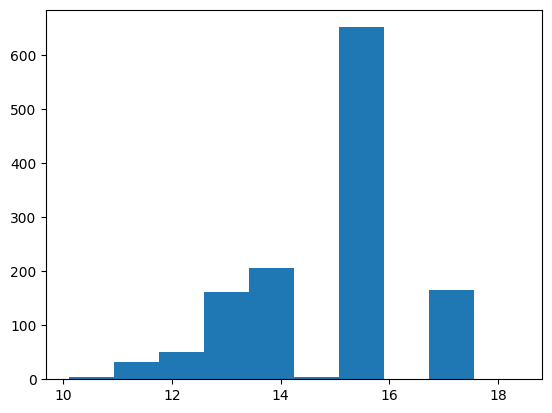

In [29]:
Inches = improved_laptop_preonehot["Inches"]

plt.hist(Inches)

In [27]:
#RAM, WEIGHT, PRCE_EUROS ,

In [28]:
improved_laptop_preonehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inches                1275 non-null   float64
 1   Ram                   1275 non-null   int64  
 2   Weight                1275 non-null   float64
 3   Price_euros           1275 non-null   float64
 4   Screen                1275 non-null   object 
 5   ScreenW               1275 non-null   int64  
 6   ScreenH               1275 non-null   int64  
 7   Touchscreen           1275 non-null   object 
 8   IPSpanel              1275 non-null   object 
 9   RetinaDisplay         1275 non-null   object 
 10  CPU_freq              1275 non-null   float64
 11  PrimaryStorage        1275 non-null   int64  
 12  SecondaryStorage      1275 non-null   int64  
 13  PrimaryStorageType    1275 non-null   object 
 14  SecondaryStorageType  1275 non-null   object 
 15  CPU_categories       

(array([1.031e+03, 2.500e+01, 1.980e+02, 3.000e+00, 1.700e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 2. ,  8.2, 14.4, 20.6, 26.8, 33. , 39.2, 45.4, 51.6, 57.8, 64. ]),
 <BarContainer object of 10 artists>)

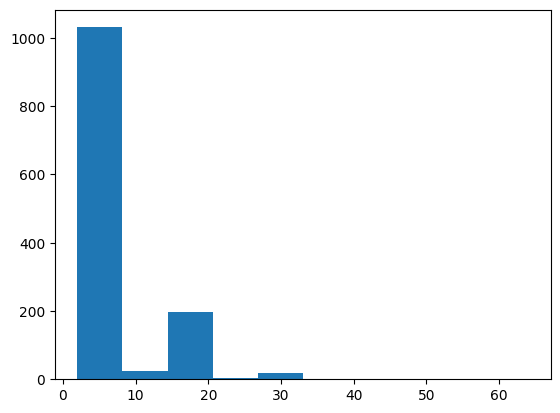

In [42]:
RAM = improved_laptop_preonehot["Ram"]

plt.hist(RAM)


(array([ 29., 279., 195., 415., 203.,  81.,  27.,  11.,   8.,  27.]),
 array([0.69 , 1.091, 1.492, 1.893, 2.294, 2.695, 3.096, 3.497, 3.898,
        4.299, 4.7  ]),
 <BarContainer object of 10 artists>)

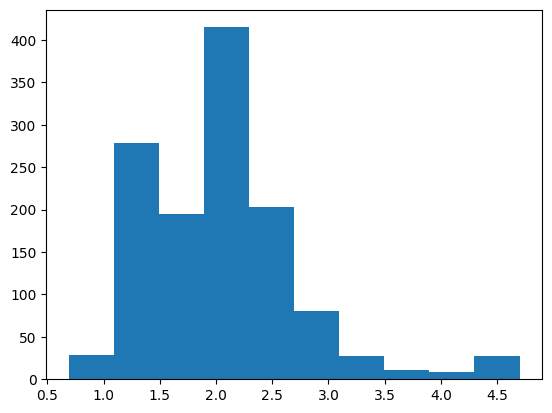

In [32]:
Weight = improved_laptop_preonehot["Weight"]

plt.hist(Weight)

([<matplotlib.axis.XTick at 0x7e6bbf5b61d0>,
  ...],
 [Text(0.0, 0, 'Intel Iris Plus'),
  Text(1.0, 0, 'Intel HD Graphics'),
  Text(1.0, 0, 'Intel HD Graphics'),
  Text(2.0, 0, 'AMD Radeon Pro'),
  Text(0.0, 0, 'Intel Iris Plus'),
  Text(3.0, 0, 'AMD Radeon'),
  Text(4.0, 0, 'Intel (Other)'),
  Text(1.0, 0, 'Intel HD Graphics'),
  Text(5.0, 0, 'Nvidia GeForce MX'),
  Text(1.0, 0, 'Intel HD Graphics'),
  Text(1.0, 0, 'Intel HD Graphics'),
  Text(1.0, 0, 'Intel HD Graphics'),
  Text(2.0, 0, 'AMD Radeon Pro'),
  Text(3.0, 0, 'AMD Radeon'),
  Text(1.0, 0, 'Intel HD Graphics'),
  Text(0.0, 0, 'Intel Iris Plus'),
  Text(3.0, 0, 'AMD Radeon'),
  Text(2.0, 0, 'AMD Radeon Pro'),
  Text(6.0, 0, 'Nvidia GeForce'),
  Text(1.0, 0, 'Intel HD Graphics'),
  Text(1.0, 0, 'Intel HD Graphics'),
  Text(7.0, 0, 'Nvidia GeForce GTX'),
  Text(3.0, 0, 'AMD Radeon'),
  Text(1.0, 0, 'Intel HD Graphics'),
  Text(1.0, 0, 'Intel HD Graphics'),
  Text(1.0, 0, 'Intel HD Graphics'),
  Text(1.0, 0, 'Intel HD Graphics'

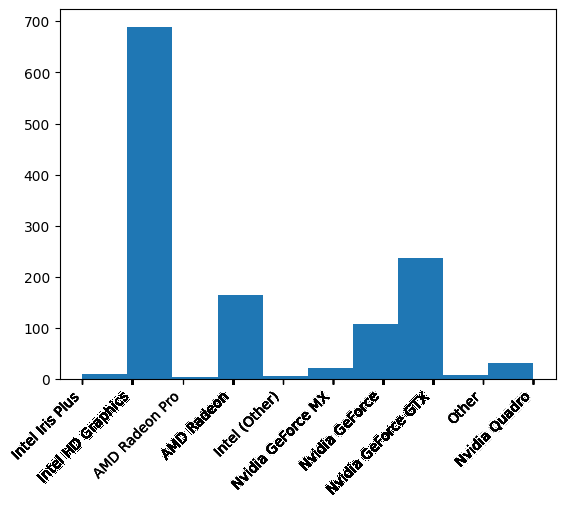

In [35]:
GPU = improved_laptop_preonehot["GPU_categories"]

plt.hist(GPU)

plt.xticks(GPU, rotation = 45, ha ='right')

([<matplotlib.axis.XTick at 0x7e6bbd773b90>,
  ...],
 [Text(0.0, 0, 'Core i5'),
  Text(0.0, 0, 'Core i5'),
  Text(0.0, 0, 'Core i5'),
  Text(1.0, 0, 'Core i7'),
  Text(0.0, 0, 'Core i5'),
  Text(2.0, 0, 'A-Series'),
  Text(1.0, 0, 'Core i7'),
  Text(0.0, 0, 'Core i5'),
  Text(1.0, 0, 'Core i7'),
  Text(0.0, 0, 'Core i5'),
  Text(0.0, 0, 'Core i5'),
  Text(3.0, 0, 'Core i3'),
  Text(1.0, 0, 'Core i7'),
  Text(3.0, 0, 'Core i3'),
  Text(4.0, 0, 'Core M'),
  Text(0.0, 0, 'Core i5'),
  Text(1.0, 0, 'Core i7'),
  Text(1.0, 0, 'Core i7'),
  Text(3.0, 0, 'Core i3'),
  Text(0.0, 0, 'Core i5'),
  Text(5.0, 0, 'Atom'),
  Text(0.0, 0, 'Core i5'),
  Text(6.0, 0, 'E-Series'),
  Text(0.0, 0, 'Core i5'),
  Text(1.0, 0, 'Core i7'),
  Text(3.0, 0, 'Core i3'),
  Text(0.0, 0, 'Core i5'),
  Text(0.0, 0, 'Core i5'),
  Text(1.0, 0, 'Core i7'),
  Text(0.0, 0, 'Core i5'),
  Text(5.0, 0, 'Atom'),
  Text(6.0, 0, 'E-Series'),
  Text(2.0, 0, 'A-Series'),
  Text(1.0, 0, 'Core i7'),
  Text(0.0, 0, 'Core i5'),
  Tex

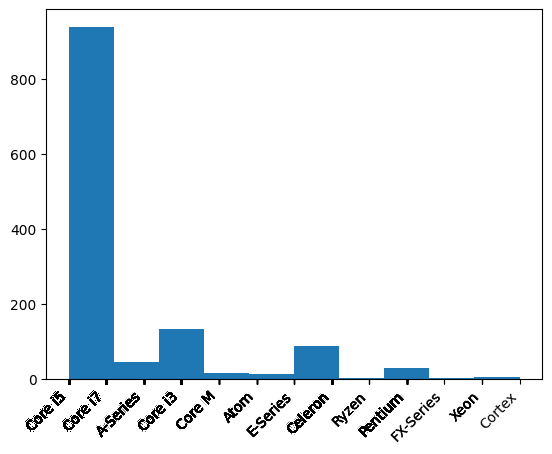

In [36]:
CPU = improved_laptop_preonehot["CPU_categories"]

plt.hist(CPU)

plt.xticks(CPU, rotation = 45, ha ='right')